# AR models

In [7]:
import pandas as pd
import numpy as np

from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf

import matplotlib.pyplot as plt

jtplot.style(figsize=(15, 9))

<AxesSubplot:>

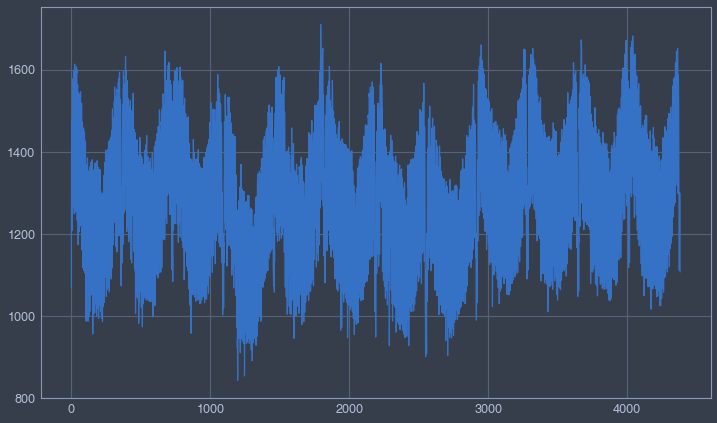

In [4]:
url='https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv'
df = pd.read_csv(url, sep=',')

df['Consumption'].plot()

In [5]:
df_stationarity_test = adfuller(df['Consumption'], autolag='AIC')
print(f'p-value: {df_stationarity_test[1]}')

p-value: 4.74405490184152e-08


In [6]:
df_stationarity_test

(-6.239148288864521,
 4.74405490184152e-08,
 31,
 4351,
 {'1%': -3.4318538295011636,
  '5%': -2.8622045082106773,
  '10%': -2.5671237222704466},
 47966.592823559666)

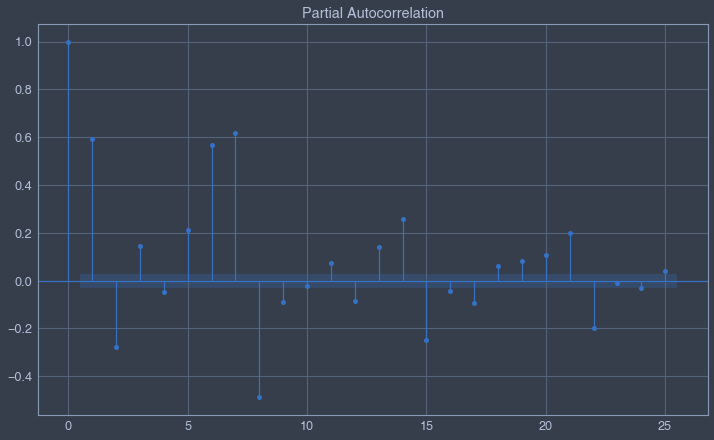

In [8]:
pacf = plot_pacf(df['Consumption'], lags=25)

In [10]:
train_data = df['Consumption'][:len(df)-100]
test_data = df['Consumption'][len(df)-100:]

ar_model = AutoReg(train_data, lags=8, old_names=True).fit()

print(ar_model.summary())

                            AutoReg Model Results                             
Dep. Variable:            Consumption   No. Observations:                 4283
Model:                     AutoReg(8)   Log Likelihood              -24231.812
Method:               Conditional MLE   S.D. of innovations             70.058
Date:                Wed, 24 Jul 2024   AIC                              8.503
Time:                        20:43:39   BIC                              8.518
Sample:                             8   HQIC                             8.509
                                 4283                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept        121.2792     14.444      8.397      0.000      92.969     149.589
Consumption.L1     0.6393      0.013     47.751      0.000       0.613       0.666
Consumption.L2    -0.0966      0.011

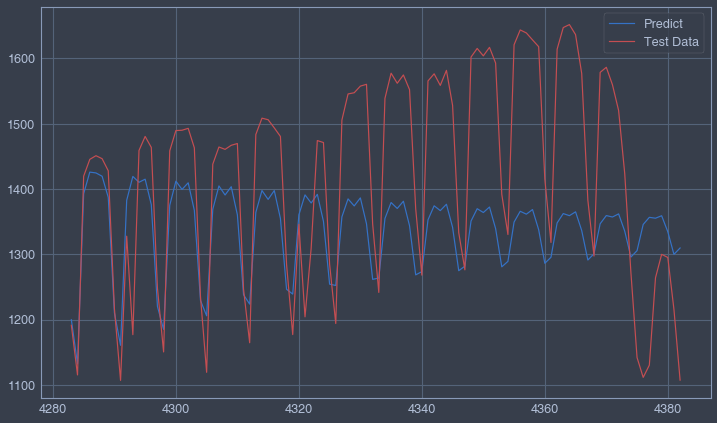

In [14]:
pred = ar_model.predict(start=len(train_data), end=(len(df)-1), dynamic=False)

plt.plot(pred, label='Predict')
plt.plot(test_data, color='r', label='Test Data')
plt.legend()